In [1]:
import librosa
import torch
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
import torchaudio.transforms as T


### Default params

In [2]:
n_fft=512
win_length=25
hop_length=10

### Utility function

In [3]:

def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None, save_to=None):
    fig, axs = plt.subplots(1, 1, figsize=(10, 5))
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("Frame")
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    if save_to is not None:
        plt.savefig(save_to,  dpi=100)
    plt.show(block=False)

#### Draw a spectrogram (figure 5), Draw components (figure 6)

In [4]:
file = '/home/alhasan/workdir/SED/data/ESC-50/raw/audio_16k/2-108017-A-24.wav' #(coughing)

In [5]:
waveform, sample_rate = torchaudio.load(file)

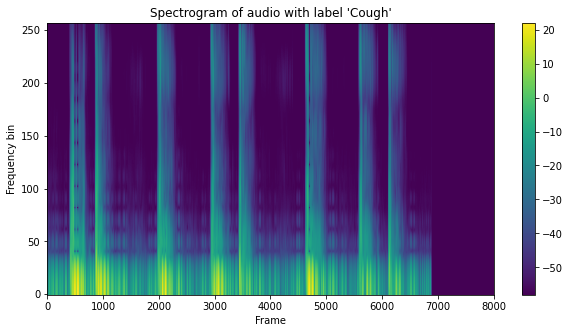

In [6]:
spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)
# Perform transformation
spec = spectrogram(waveform)

plot_spectrogram(spec[0], ylabel="Frequency bin", title="Spectrogram of audio with label 'Cough'")

In [7]:
y_harmonic, y_percussive = librosa.effects.hpss(waveform.numpy())

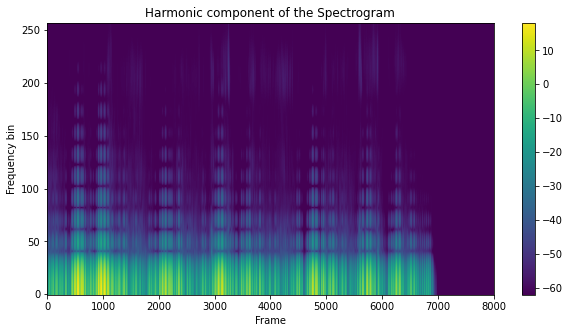

In [8]:
# Perform transformation
spec = spectrogram(torch.tensor(y_harmonic))
plot_spectrogram(spec[0], ylabel="Frequency bin", title="Harmonic component of the Spectrogram")

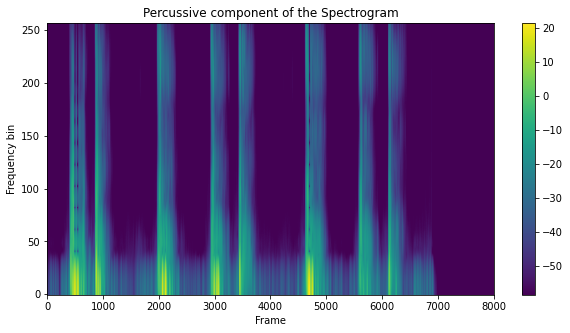

In [9]:
# Perform transformation
spec = spectrogram(torch.tensor(y_percussive))
plot_spectrogram(spec[0], ylabel="Frequency bin", title="Percussive component of the Spectrogram")

### Roaster

In [10]:
file2 = '/home/alhasan/workdir/SED/data/ESC-50/raw/no_silence/audio_16k/1-26806-A-1.wav' #(Roaster)

In [11]:
waveform, sample_rate = torchaudio.load(file2)

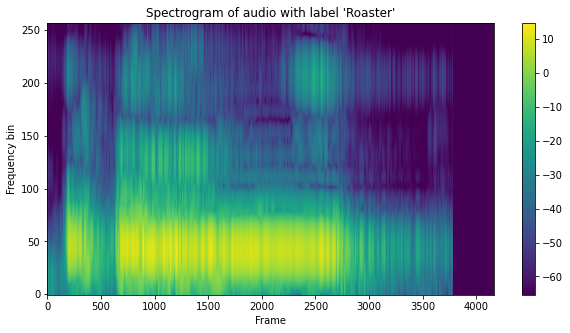

In [12]:
spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)
# Perform transformation
spec = spectrogram(waveform)

plot_spectrogram(spec[0], ylabel="Frequency bin", title="Spectrogram of audio with label 'Roaster'")

In [13]:
y_harmonic, y_percussive = librosa.effects.hpss(waveform.numpy())


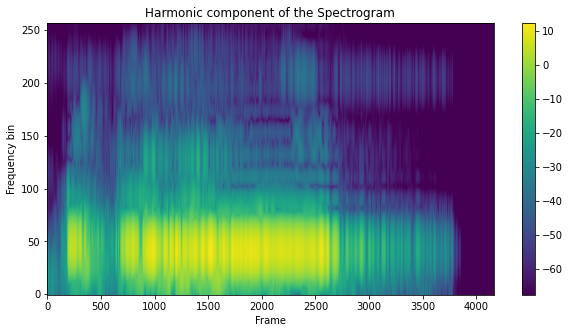

In [14]:
spec = spectrogram(torch.tensor(y_harmonic))
plot_spectrogram(spec[0], ylabel="Frequency bin", title="Harmonic component of the Spectrogram")

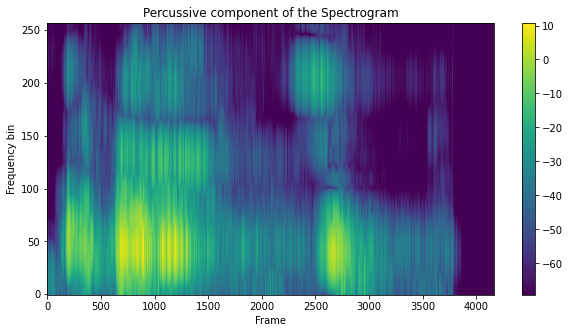

In [15]:
spec = spectrogram(torch.tensor(y_percussive))
plot_spectrogram(spec[0], ylabel="Frequency bin", title="Percussive component of the Spectrogram")



#### Draw augs (figure 4)

In [19]:
waveform, sample_rate = torchaudio.load(file2) # file 2: roaster
spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=None,
)
spec = spectrogram(waveform)
spec = spec [:, :,:500 ]
print(spec[0].shape)

torch.Size([257, 500])


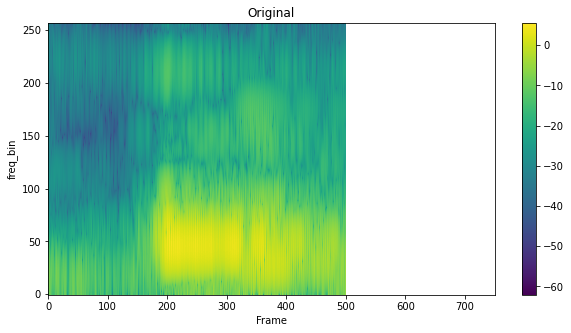

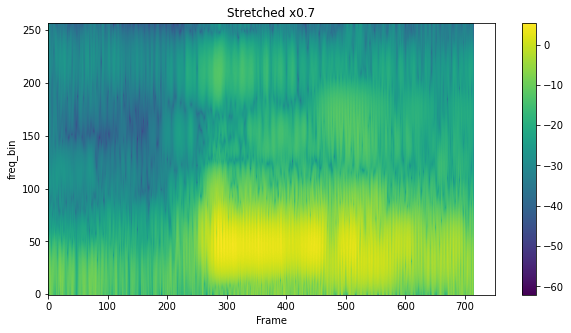

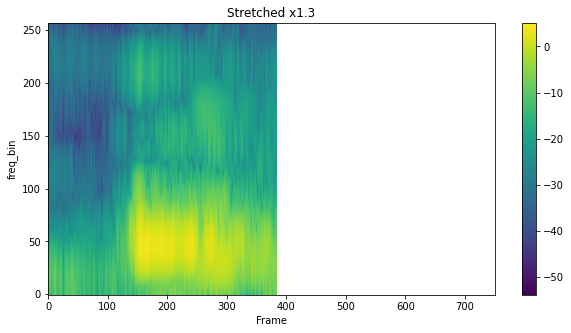

In [24]:
stretch = T.TimeStretch(n_freq=n_fft//2+1)
plot_spectrogram(torch.abs(spec[0]), title="Original",  xmax=750)


rate = 0.7
spec_ = stretch(spec, rate)
plot_spectrogram(torch.abs(spec_[0]), title=f"Stretched x{rate}",  xmax=750)


rate = 1.3
spec_ = stretch(spec, rate)
plot_spectrogram(torch.abs(spec_[0]), title=f"Stretched x{rate}", xmax=750)

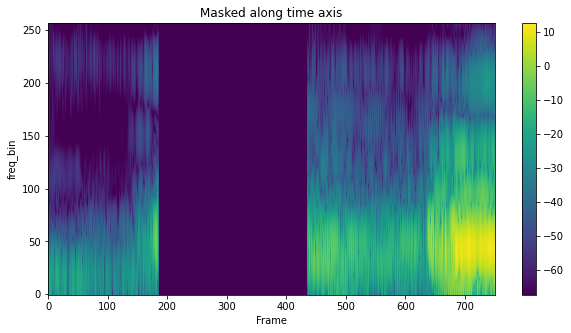

In [25]:
waveform, sample_rate = torchaudio.load(file2) # file 2: roaster
spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)
spec = spectrogram(waveform)
spec = spec [:, :,:750]
masking = T.TimeMasking(time_mask_param=300)
spec = masking(spec)

plot_spectrogram(spec[0], title="Masked along time axis",xmax=750)


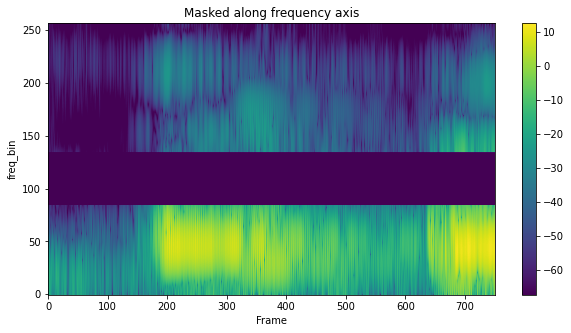

In [28]:
spec = spectrogram(waveform)
spec = spec [:, :,:750 ]
masking = T.FrequencyMasking(freq_mask_param=80)
spec = masking(spec)

plot_spectrogram(spec[0], title="Masked along frequency axis",xmax=750)